In [1]:
"""
Tareas:
    1. Preparación del dataset:
        ○ Explora el dataset y familiarízate con las características.
        ○ Preprocesa el dataset para manejar valores nulos o inconsistentes.
        ○ Aplica técnicas de reducción de dimensionalidad si es necesario.
        ○ Separa el dataset en conjuntos de entrenamiento, validación y prueba.
    2. Selección de técnicas de aprendizaje automático:
        ○ Investiga diversas técnicas de aprendizaje automático para la clasificación de malware.
        ○ Selecciona una o más técnicas adecuadas (modelos de ML) para este
          problema, considerando el desbalance de clases.
        ○ Justifica la elección de las técnicas seleccionadas.
    3. Entrenamiento del modelo:
        ○ Implementa las técnicas de aprendizaje automático elegidas.
        ○ Entrena el modelo utilizando el conjunto de entrenamiento.
        ○ Optimiza los hiperparámetros del modelo para obtener la mejor
          precisión posible, considerando el desbalance de clases.
    4. Evaluación del modelo:
        ○ Evalúa el rendimiento del modelo en los conjuntos de validación y
          prueba.
        ○ Calcula métricas de evaluación apropiadas para el problema, como
          precisión,sensibilidad, especificidad y AUC-ROC.
        ○ Analiza los resultados de la evaluación e identifica posibles mejoras.
    5. Interpretación del modelo:
        ○ Analiza los resultados del modelo para identificar las características
          más importantes para la clasificación de malware.
        ○ Visualiza los resultados del modelo para comprender mejor su
          funcionamiento.

"""

'\nTareas:\n    1. Preparación del dataset:\n        ○ Explora el dataset y familiarízate con las características.\n        ○ Preprocesa el dataset para manejar valores nulos o inconsistentes.\n        ○ Aplica técnicas de reducción de dimensionalidad si es necesario.\n        ○ Separa el dataset en conjuntos de entrenamiento, validación y prueba.\n    2. Selección de técnicas de aprendizaje automático:\n        ○ Investiga diversas técnicas de aprendizaje automático para la clasificación de malware.\n        ○ Selecciona una o más técnicas adecuadas (modelos de ML) para este\n          problema, considerando el desbalance de clases.\n        ○ Justifica la elección de las técnicas seleccionadas.\n    3. Entrenamiento del modelo:\n        ○ Implementa las técnicas de aprendizaje automático elegidas.\n        ○ Entrena el modelo utilizando el conjunto de entrenamiento.\n        ○ Optimiza los hiperparámetros del modelo para obtener la mejor\n          precisión posible, considerando el 

In [2]:
#Paso 1: Explora el dataset y familiarízate con las características

import pandas as pd
malware = pd.read_csv('C:\\Users\\User\\Downloads\\uci_malware_detection.csv')
print(malware.head()) #Estadísticas del dataset
print(malware.info()) #Rango de columnas y filas incluyendo las etiquetas

# Los valores de media y máximo nos indican una gran dispersión de datos dentro de algunas columnas.
# Estas pueden deberse a valores faltantes o vacíos dentro del dataset o que dentro de las mismas se encuentren muchos
# valores cercanos a cero.


           Label  F_1  F_2  F_3  F_4  F_5  F_6  F_7  F_8  F_9  ...  F_522  \
0  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
1  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
2  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
3  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
4  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   

   F_523  F_524  F_525  F_526  F_527  F_528  F_529  F_530  F_531  
0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0  

[5 rows x 532 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Columns: 532 entries, Label to F_531
dt

In [3]:
#Paso 1: Preprocesa el dataset para manejar valores nulos o inconsistentes.
nulos = malware.drop(columns=['Label']).isnull().sum()

# Mostrar los valores nulos por columna
print("Valores nulos por columna:")
print(nulos)
# No presenta valores nulos en el Dataset

# Valores inconsistentes
print(malware.describe())
# Permite conocer la media con valores de columnas menor a 0.09 y máximo 1, lo cúal nos indica que existe una
# dispersión fuerte de los valores hacia el número cero.

Valores nulos por columna:
F_1      0
F_2      0
F_3      0
F_4      0
F_5      0
        ..
F_527    0
F_528    0
F_529    0
F_530    0
F_531    0
Length: 531, dtype: int64
              F_1    F_2         F_3         F_4         F_5    F_6  \
count  373.000000  373.0  373.000000  373.000000  373.000000  373.0   
mean     0.997319    0.0    0.994638    0.002681    0.994638    0.0   
std      0.051778    0.0    0.073127    0.051778    0.073127    0.0   
min      0.000000    0.0    0.000000    0.000000    0.000000    0.0   
25%      1.000000    0.0    1.000000    0.000000    1.000000    0.0   
50%      1.000000    0.0    1.000000    0.000000    1.000000    0.0   
75%      1.000000    0.0    1.000000    0.000000    1.000000    0.0   
max      1.000000    0.0    1.000000    1.000000    1.000000    0.0   

              F_7    F_8         F_9   F_10  ...      F_522       F_523  \
count  373.000000  373.0  373.000000  373.0  ...  373.00000  373.000000   
mean     0.994638    0.0    0.994638

In [4]:
#Características (X) y etiquetas (y)
X = malware.drop(columns=['Label'])  # Excluir la columna de etiqueta
y = malware['Label']

# Verificar las primeras filas de X y y 
print("Características (X):")
print(X.head())
print("\nEtiquetas (y):")
print(y.head())

Características (X):
   F_1  F_2  F_3  F_4  F_5  F_6  F_7  F_8  F_9  F_10  ...  F_522  F_523  \
0    1    0    1    0    1    0    1    0    1     0  ...      0      0   
1    1    0    1    0    1    0    1    0    1     0  ...      0      0   
2    1    0    1    0    1    0    1    0    1     0  ...      0      0   
3    1    0    1    0    1    0    1    0    1     0  ...      0      0   
4    1    0    1    0    1    0    1    0    1     0  ...      0      0   

   F_524  F_525  F_526  F_527  F_528  F_529  F_530  F_531  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 531 columns]

Etiquetas (y):
0    non-malicious
1    non-malicious
2    non-malicious
3    non-malicious
4    non-malicious
Name: Label, dtype: object


In [5]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)
import numpy as np

# Contar las clases en y
clases, conteo = np.unique(y_resampled, return_counts=True)
print("Clases después de oversampling:", dict(zip(clases, conteo)))

Clases después de oversampling: {'malicious': 301, 'non-malicious': 301}


In [6]:
#Paso 1: Separa el dataset en conjuntos de entrenamiento, validación y prueba.
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Imprimir los tamaños de los conjuntos de datos resultantes
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])



Tamaño del conjunto de entrenamiento: 481
Tamaño del conjunto de prueba: 121


In [7]:
# Paso 2:
"""Este tipo de aprendizaje automático es supervisado para clasificación de malware 
porque utiliza un clasificador de bosque aleatorio (RandomForestClassifier). 
Este clasificador es una técnica de aprendizaje automático que se basa en el ensamblaje 
de múltiples árboles de decisión entrenados en diferentes subconjuntos del conjunto de datos ya que se entrenó 
un modelo utilizando un conjunto de datos etiquetado con ejemplos de malware y software benigno. 
El modelo luego utiliza esta información etiquetada para hacer predicciones sobre nuevos archivos 
ejecutables y clasificarlos como maliciosos o benignos."""


'Este tipo de aprendizaje automático es supervisado para clasificación de malware \nporque utiliza un clasificador de bosque aleatorio (RandomForestClassifier). \nEste clasificador es una técnica de aprendizaje automático que se basa en el ensamblaje \nde múltiples árboles de decisión entrenados en diferentes subconjuntos del conjunto de datos ya que se entrenó \nun modelo utilizando un conjunto de datos etiquetado con ejemplos de malware y software benigno. \nEl modelo luego utiliza esta información etiquetada para hacer predicciones sobre nuevos archivos \nejecutables y clasificarlos como maliciosos o benignos.'

In [8]:
# Paso 3
# Se inicializa y entrena un modelo de clasificación de bosque aleatorio utilizando RandomForestClassifier de scikit-learn.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)



In [9]:
#Paso 4

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Obtener TN, FP, FN, TP de la matriz de confusión
TN, FP, FN, TP = conf_matrix.ravel()

print("Matriz de confusión:")
print(conf_matrix)

Exactitud del modelo: 0.9917355371900827
Reporte de clasificación:
               precision    recall  f1-score   support

    malicious       1.00      0.98      0.99        66
non-malicious       0.98      1.00      0.99        55

     accuracy                           0.99       121
    macro avg       0.99      0.99      0.99       121
 weighted avg       0.99      0.99      0.99       121

Matriz de confusión:
[[65  1]
 [ 0 55]]


In [10]:
# Precisión: La clasificación para la clase maliciosa fue del 100% después de utilizar el oversampling y solo el 98% no maliciosa.
# Exhaustividad (recall): Para ambas clases, la exhaustividad es del 98% o superior, lo que indica que el modelo identificó correctamente la gran mayoría de las muestras positivas.
# f1-score: Adecuada proporcionalidad entre la precisión y la Exhaustividad (recall)
# El soporte indica el número de muestras de cada clase en el conjunto de prueba. Hay 66 muestras de la clase maliciosa y 55 muestras de la clase no maliciosa.
# Como resultado una exactitud del modelo del 99%

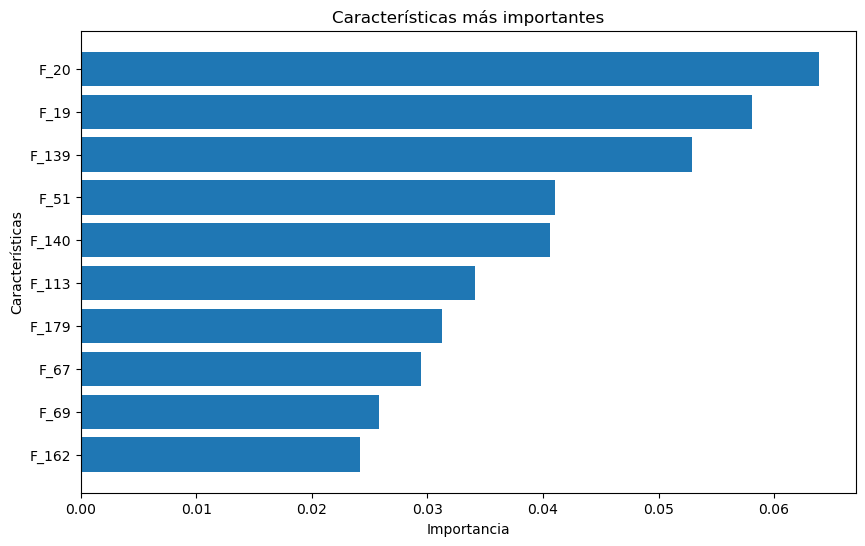

Características más importantes:
     Feature  Importance
19     F_20    0.063887
18     F_19    0.058095
138   F_139    0.052930
50     F_51    0.041044
139   F_140    0.040605
112   F_113    0.034085
178   F_179    0.031218
66     F_67    0.029414
68     F_69    0.025772
161   F_162    0.024187


In [11]:
#Paso 5
import matplotlib.pyplot as plt

# Obtener la importancia de las características del modelo
importances = model.feature_importances_

# Obtener el nombre de las características
feature_names = X_train.columns

# Crear un DataFrame para visualizar las características y sus importancias
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Graficar las características más importantes
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'][:10], feature_importances_df['Importance'][:10])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Características más importantes')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

# Mostrar las características más importantes
top_features = feature_importances_df.head(10)
print("Características más importantes:\n", top_features)

In [12]:
# Las características más importantes en un modelo de Bosque Aleatorio se determinan según su contribución 
# a la reducción de la impureza en los nodos del árbol de decisión durante el proceso de entrenamiento. 
# Ayudan al modelo a hacer predicciones precisas se consideran las más importantes.